SALES PREDICTION USING PYTHON

Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

In [3]:
import pandas as pd
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 1.2748262109549338
Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


C:\Users\Arjun Singh Rajput\AppData\Local\Temp\ipykernel_11880\200464228.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='cyan')


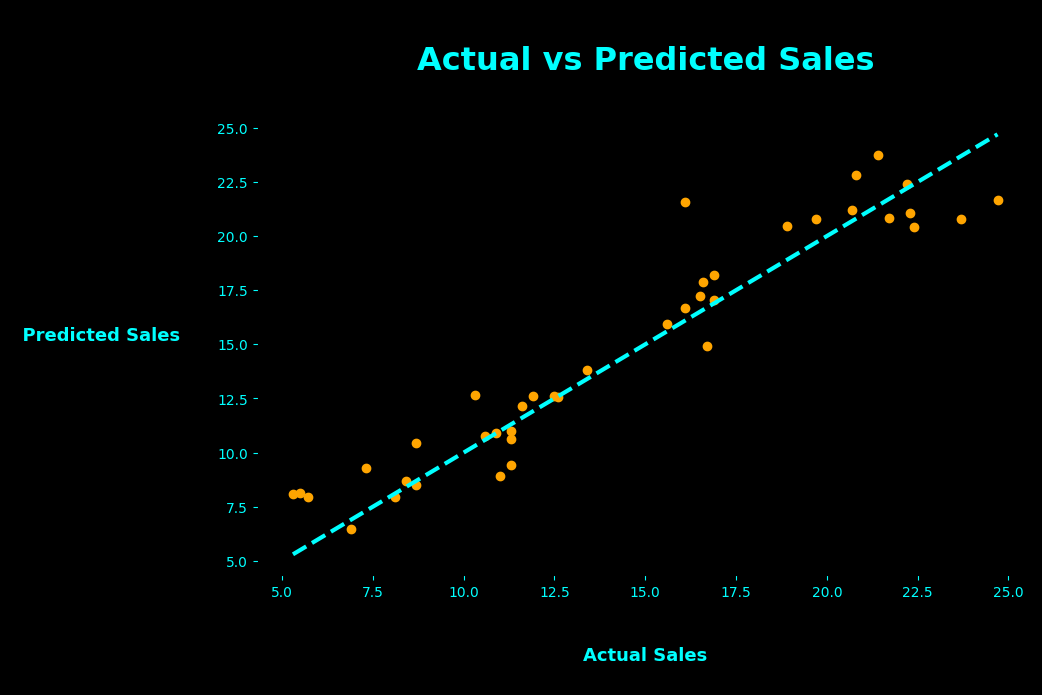

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')  
ax.set_facecolor('black') 

ax.scatter(y_test, y_pred, color='orange')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='cyan')
ax.set_xlabel('\n\nActual Sales\n', fontsize=13, fontweight='bold', color='cyan')
ax.set_ylabel('  Predicted Sales        ', rotation=0, labelpad=70, fontsize=13, fontweight='bold', color='cyan') 
ax.set_title('\nActual vs Predicted Sales\n', fontsize=23, fontweight='bold', color='cyan')
ax.tick_params(axis='x', colors='cyan')
ax.tick_params(axis='y', colors='cyan')
plt.show()